In [1]:
#Imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn import metrics

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('emails.csv')
feature_names = data.columns
# print("Features", feature_names)
y = data.iloc[:, -1] # last column the predicition
x = data.iloc[:, 1:-1] # all columns except the first and last

cm_labels = ['spam', 'not spam']

In [3]:
#Scaling
x = (x - np.min(x)) / (np.max(x) - np.min(x)) #Normalization
# x = (x - np.mean(x)) / np.std(x) #scaling with a normal distribution with mean 0 and standard deviation of 1

In [4]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4137, 3000), (1035, 3000), (4137,), (1035,))

In [5]:
#train the model (Here you should change the hyperparameters)
clf = SVC(C=10, kernel='linear') # Create SVM object
clf.fit(X_train, y_train) # Train SVM Classifer

SVC(C=10, kernel='linear')

In [6]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Scaling Methods
# Normalization = 
# Nomral distribution = 

# C-Value:
# 0.0001 = 
# 0.001 = 
# 0.01 = 
# 0.1 = 
# 1 = 
# 10 = 
# 100 = 

# Kernel Type:
# linear = 
# poly = 
# rbf = 
# sigmoid = 

# All values were based on an average of 5 runs.

Accuracy: 0.9729468599033816


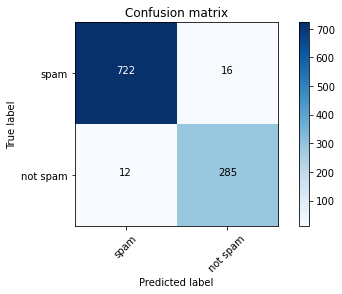

In [8]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, cm_labels)  
plt.show()